In [74]:
from __future__ import print_function
import os
data_path = ['data']



In [75]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['worldhappiness.csv'])
data = pd.read_csv('worldhappiness.csv')
data 

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1704,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1705,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1706,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1707,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [76]:
data.head(1).T

,0
Country name,Afghanistan
year,2008
Life Ladder,3.724
Log GDP per capita,7.37
Social support,0.451
Healthy life expectancy at birth,50.8
Freedom to make life choices,0.718
Generosity,0.168
Perceptions of corruption,0.882
Positive affect,0.518


In [77]:
# Remove extraneous columns
data.drop(['year'], axis=1, inplace=True)
data


,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1704,Zimbabwe,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1705,Zimbabwe,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1706,Zimbabwe,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1707,Zimbabwe,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [78]:
data.columns

Index(['Country name', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [79]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'Country name']

# Split the data into two dataframes
data[x_cols]=data[x_cols].fillna(0)
data['Country name']=data['Country name'].fillna(0)
X_data = data[x_cols]
y_data =data['Country name']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [82]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [83]:
score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

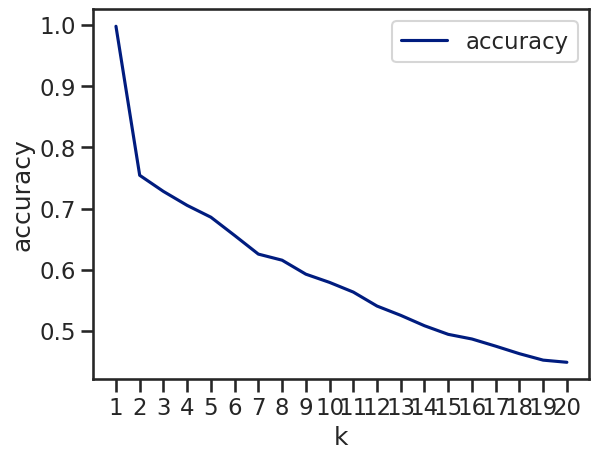

In [85]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));